In [1]:
# importing important Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading dataset
dataset=pd.read_csv("Pre_melbourn.csv")

In [4]:
dataset

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,2.0,1.0,0,156.0,1900.0,Yarra,Northern Metropolitan,4019
1,Abbotsford,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,3.0,2.0,0,134.0,1900.0,Yarra,Northern Metropolitan,4019
2,Abbotsford,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,3.0,1.0,2,120.0,2014.0,Yarra,Northern Metropolitan,4019
3,Abbotsford,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067,4.0,2.0,0,245.0,1910.0,Yarra,Northern Metropolitan,4019
4,Abbotsford,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067,2.0,1.0,2,256.0,1890.0,Yarra,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8200,Wheelers Hill,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150,4.0,2.0,2,652.0,1981.0,Melbourne,South-Eastern Metropolitan,7392
8201,Williamstown,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016,3.0,2.0,2,333.0,1995.0,Melbourne,Western Metropolitan,6380
8202,Williamstown,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016,3.0,2.0,4,436.0,1997.0,Melbourne,Western Metropolitan,6380
8203,Williamstown,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016,4.0,1.0,5,866.0,1920.0,Melbourne,Western Metropolitan,6380


In [5]:
# Checking the null/Nan and missing values
dataset.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [6]:
#Checking the data types of columns in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8205 entries, 0 to 8204
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8205 non-null   object 
 1   Rooms          8205 non-null   int64  
 2   Type           8205 non-null   object 
 3   Price          8205 non-null   float64
 4   Method         8205 non-null   object 
 5   SellerG        8205 non-null   object 
 6   Date           8205 non-null   object 
 7   Distance       8205 non-null   float64
 8   Postcode       8205 non-null   int64  
 9   Bedroom2       8205 non-null   float64
 10  Bathroom       8205 non-null   float64
 11  Car            8205 non-null   int64  
 12  Landsize       8205 non-null   float64
 13  YearBuilt      8205 non-null   float64
 14  CouncilArea    8205 non-null   object 
 15  Regionname     8205 non-null   object 
 16  Propertycount  8205 non-null   int64  
dtypes: float64(6), int64(4), object(7)
memory usage: 1.1

In [7]:
# describe is the predefined function used to check the important values
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount
count,8205.00000,8.205000e+03,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000,8205.000000
mean,2.93504,1.065797e+06,10.009957,3105.223888,2.911274,1.574771,1.588422,494.002438,1964.684217,7473.018891
std,0.97958,6.662572e+05,5.920122,90.187497,0.976404,0.704635,0.935975,993.221164,37.273762,4347.854121
min,1.00000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,389.000000
25%,2.00000,6.210000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,158.000000,1940.000000,4442.000000
50%,3.00000,8.800000e+05,9.200000,3084.000000,3.000000,1.000000,1.000000,388.000000,1970.000000,6567.000000
75%,4.00000,1.320000e+06,12.900000,3148.000000,4.000000,2.000000,2.000000,640.000000,1999.000000,10331.000000
max,10.00000,9.000000e+06,47.400000,3977.000000,10.000000,8.000000,10.000000,37000.000000,2018.000000,21650.000000


In [8]:
#Splitting the columns into quantative and qualitative 
def QuanQual(dataset):
    quan=[]
    qual=[]
    for ColumnName in dataset.columns:
        #print(ColumnName)
        if (dataset[ColumnName].dtypes=='O'):
            #print("qual")
            qual.append(ColumnName)
        else:
            #print("quan")
            quan.append(ColumnName)
    return quan,qual

In [9]:
quan,qual=QuanQual(dataset)

In [10]:
quan

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'YearBuilt',
 'Propertycount']

In [11]:
qual

['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']

## Performing the Univariate

In [12]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode",
                                "Q1:25%","Q2:50%","Q3:75%","Q4:99%","Q5:100%",
                                "IQR","1.5Rule","Lesser","Greater","Min","Max","Kurtosis","Skewness","Variance","Std_deviation"],columns=quan)

for ColumnName in quan:
    
    descriptive[ColumnName]["Mean"]=dataset[ColumnName].mean()
    descriptive[ColumnName]["Mean"]=dataset[ColumnName].mean()
    descriptive[ColumnName]["Median"]=dataset[ColumnName].median()
    descriptive[ColumnName]["Mode"]=dataset[ColumnName].mode()[0]
    descriptive[ColumnName]["Q1:25%"]=dataset.describe()[ColumnName]["25%"] 
    descriptive[ColumnName]["Q2:50%"]=dataset.describe()[ColumnName]["50%"]
    descriptive[ColumnName]["Q3:75%"]=dataset.describe()[ColumnName]["75%"]
    descriptive[ColumnName]["Q4:99%"]=np.percentile(dataset[ColumnName],99)
    descriptive[ColumnName]["Q5:100%"]=dataset.describe()[ColumnName]["max"]
    descriptive[ColumnName]["IQR"]= descriptive[ColumnName]["Q3:75%"]-descriptive[ColumnName]["Q1:25%"]
    descriptive[ColumnName]["1.5Rule"]=1.5*descriptive[ColumnName]["IQR"]
    descriptive[ColumnName]["Lesser"]=descriptive[ColumnName]["Q1:25%"]-descriptive[ColumnName]["1.5Rule"]
    descriptive[ColumnName]["Greater"]=descriptive[ColumnName]["Q3:75%"]+descriptive[ColumnName]["1.5Rule"]
    descriptive[ColumnName]["Min"]=dataset[ColumnName].min()
    descriptive[ColumnName]["Max"]=dataset[ColumnName].max()
    descriptive[ColumnName]["Kurtosis"]=dataset[ColumnName].kurtosis()
    descriptive[ColumnName]["Skewness"]=dataset[ColumnName].skew()
    descriptive[ColumnName]["Variance"]=dataset[ColumnName].var()
    descriptive[ColumnName]["Std_deviation"]=dataset[ColumnName].std()

In [13]:
descriptive

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount
Mean,2.93504,1065796.974528,10.009957,3105.223888,2.911274,1.574771,1.588422,494.002438,1964.684217,7473.018891
Median,3.0,880000.0,9.2,3084.0,3.0,1.0,1.0,388.0,1970.0,6567.0
Mode,3,600000.0,11.2,3073,3.0,1.0,1,0.0,1970.0,21650
Q1:25%,2.0,621000.0,5.9,3044.0,2.0,1.0,1.0,158.0,1940.0,4442.0
Q2:50%,3.0,880000.0,9.2,3084.0,3.0,1.0,1.0,388.0,1970.0,6567.0
Q3:75%,4.0,1320000.0,12.9,3148.0,4.0,2.0,2.0,640.0,1999.0,10331.0
Q4:99%,5.0,3400960.0,32.276,3429.0,5.0,4.0,4.0,2953.6,2015.0,21650.0
Q5:100%,10.0,9000000.0,47.4,3977.0,10.0,8.0,10.0,37000.0,2018.0,21650.0
IQR,2.0,699000.0,7.0,104.0,2.0,1.0,1.0,482.0,59.0,5889.0
1.5Rule,3.0,1048500.0,10.5,156.0,3.0,1.5,1.5,723.0,88.5,8833.5


In [14]:
def ftable(columnName,dataset):
        ftable=pd.DataFrame(columns=["Unique_values","Frequency","Relative_Frequency","Cumsum"])
        ftable["Unique_values"]=dataset[columnName].value_counts().index
        ftable["Frequency"]=dataset[columnName].value_counts().values
        ftable["Relative_Frequency"]=ftable["Frequency"]/103
        ftable["Cumsum"]=ftable["Relative_Frequency"].cumsum()
        return ftable

In [15]:
ftable("Price",dataset)

,Unique_values,Frequency,Relative_Frequency,Cumsum
0,600000.0,70,0.679612,0.679612
1,1100000.0,68,0.660194,1.339806
2,650000.0,66,0.640777,1.980583
3,800000.0,64,0.621359,2.601942
4,1300000.0,63,0.611650,3.213592
...,...,...,...,...
1783,528500.0,1,0.009709,79.621359
1784,368000.0,1,0.009709,79.631068
1785,665500.0,1,0.009709,79.640777
1786,550055.0,1,0.009709,79.650485


## Finding the Outliers

In [16]:
lesser=[]
greater=[]
for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
        if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
            greater.append(columnName)


In [17]:
lesser

['YearBuilt']

In [18]:
greater

[]

## Replacing the Outliers

In [19]:
for columnName1 in lesser:
    dataset[columnName1][dataset[columnName1] < descriptive[columnName]["Lesser"]] = descriptive[columnName]["Lesser"]
        
        # Replace outliers in the greater range
for columnName in greater:
    dataset[columnName1][dataset[columnName1] > descriptive[columnName]["Greater"]] = descriptive[columnName]["Greater"]
        


In [20]:
# Checking the outliers was removed from the dataset
descriptive=pd.DataFrame(index=["Mean","Median","Mode",
                                "Q1:25%","Q2:50%","Q3:75%","Q4:99%","Q5:100%",
                                "IQR","1.5Rule","Lesser","Greater","Min","Max","Kurtosis","Skewness","Variance","Std_deviation"],columns=quan)

for ColumnName in quan:
    
    descriptive[ColumnName]["Mean"]=dataset[ColumnName].mean()
    descriptive[ColumnName]["Mean"]=dataset[ColumnName].mean()
    descriptive[ColumnName]["Median"]=dataset[ColumnName].median()
    descriptive[ColumnName]["Mode"]=dataset[ColumnName].mode()[0]
    descriptive[ColumnName]["Q1:25%"]=dataset.describe()[ColumnName]["25%"] 
    descriptive[ColumnName]["Q2:50%"]=dataset.describe()[ColumnName]["50%"]
    descriptive[ColumnName]["Q3:75%"]=dataset.describe()[ColumnName]["75%"]
    descriptive[ColumnName]["Q4:99%"]=np.percentile(dataset[ColumnName],99)
    descriptive[ColumnName]["Q5:100%"]=dataset.describe()[ColumnName]["max"]
    descriptive[ColumnName]["IQR"]= descriptive[ColumnName]["Q3:75%"]-descriptive[ColumnName]["Q1:25%"]
    descriptive[ColumnName]["1.5Rule"]=1.5*descriptive[ColumnName]["IQR"]
    descriptive[ColumnName]["Lesser"]=descriptive[ColumnName]["Q1:25%"]-descriptive[ColumnName]["1.5Rule"]
    descriptive[ColumnName]["Greater"]=descriptive[ColumnName]["Q3:75%"]+descriptive[ColumnName]["1.5Rule"]
    descriptive[ColumnName]["Min"]=dataset[ColumnName].min()
    descriptive[ColumnName]["Max"]=dataset[ColumnName].max()
    descriptive[ColumnName]["Kurtosis"]=dataset[ColumnName].kurtosis()
    descriptive[ColumnName]["Skewness"]=dataset[ColumnName].skew()
    descriptive[ColumnName]["Variance"]=dataset[ColumnName].var()
    descriptive[ColumnName]["Std_deviation"]=dataset[ColumnName].std()

In [21]:
descriptive


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount
Mean,2.93504,1065796.974528,10.009957,3105.223888,2.911274,1.574771,1.588422,494.002438,1964.684217,7473.018891
Median,3.0,880000.0,9.2,3084.0,3.0,1.0,1.0,388.0,1970.0,6567.0
Mode,3,600000.0,11.2,3073,3.0,1.0,1,0.0,1970.0,21650
Q1:25%,2.0,621000.0,5.9,3044.0,2.0,1.0,1.0,158.0,1940.0,4442.0
Q2:50%,3.0,880000.0,9.2,3084.0,3.0,1.0,1.0,388.0,1970.0,6567.0
Q3:75%,4.0,1320000.0,12.9,3148.0,4.0,2.0,2.0,640.0,1999.0,10331.0
Q4:99%,5.0,3400960.0,32.276,3429.0,5.0,4.0,4.0,2953.6,2015.0,21650.0
Q5:100%,10.0,9000000.0,47.4,3977.0,10.0,8.0,10.0,37000.0,2018.0,21650.0
IQR,2.0,699000.0,7.0,104.0,2.0,1.0,1.0,482.0,59.0,5889.0
1.5Rule,3.0,1048500.0,10.5,156.0,3.0,1.5,1.5,723.0,88.5,8833.5


In [22]:
lesser=[]
greater=[]
for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
        if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
            greater.append(columnName)


In [23]:
lesser

['YearBuilt']

In [24]:
greater

[]

## Probability Density Function

<Axes: xlabel='Propertycount', ylabel='Density'>

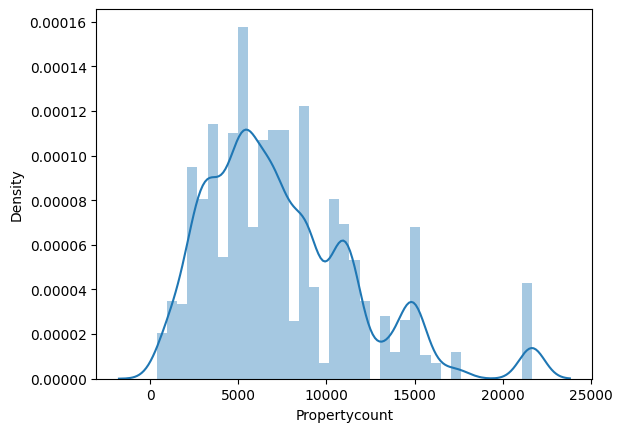

In [25]:
sns.distplot(dataset['Propertycount'])

In [26]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print("Mean = %.3f,Standard Deviation = %.3f" %(sample_mean,sample_std))
    dist=norm(sample_mean,sample_std)
    values=[value for value in range(startrange,endrange)]
    probabilities = [dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between the range({},{}):{}".format(startrange,endrange,prob))
    return prob

Mean = 7473.019,Standard Deviation = 4347.854
The area between the range(7000,10000):0.26277158399841427


0.26277158399841427

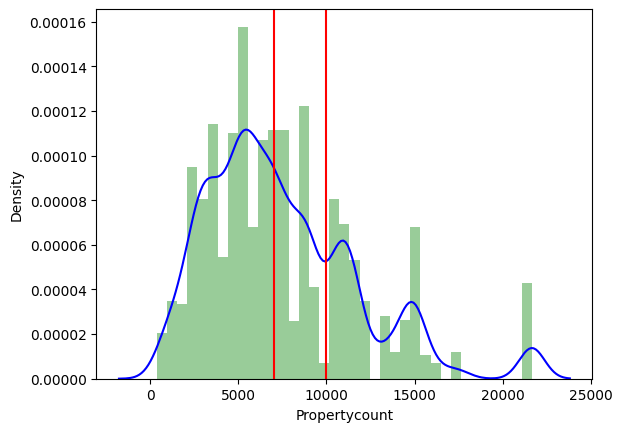

In [27]:
get_pdf_probability(dataset['Propertycount'],7000,10000)

## Cumulative density function

In [28]:
#Cumulative density function'
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['Propertycount'])
ecdf(7000)

0.5469835466179159

## Standard Normal Distribution

In [29]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)

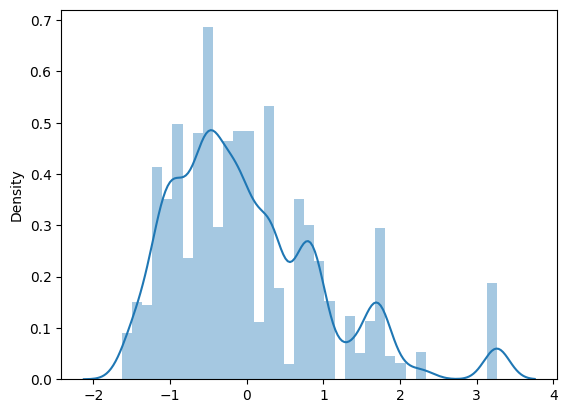

In [30]:
stdNBgraph(dataset['Propertycount'])

In [31]:
dataset.to_csv("Univariate_Pre_melbourn.csv",index=False)

## Bivariate

In [32]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
formula='Price ~ C(Distance) + C(Landsize) + C(Distance):C(Landsize)'
model = ols(formula, data=dataset).fit() 
sm.stats.anova_lm(model, type=2) 

MemoryError: Unable to allocate 15.0 GiB for an array with shape (244926, 8205) and data type float64